# **HEBB**

In [ ]:
import numpy as np

def hebbian_learning(inputs, outputs, learning_rate=1.0, epochs=1, activation_func=None, initial_weights=None):
    """
    Generalized Hebbian learning algorithm based on the Hebb rule theory provided.

    Parameters:
        inputs (ndarray): Array of input vectors (including bias as first element).
        outputs (ndarray): Array of target outputs (bipolar: 1 or -1).
        learning_rate (float): Learning rate for weight updates. Set to 1.0 for exact Hebb rule.
        epochs (int): Number of training epochs. Set to 1 for single-pass learning.
        activation_func (callable, optional): Activation function for inference (default: sign function).
        initial_weights (ndarray, optional): Initial weight vector (default: zeros).

    Returns:
        ndarray: Learned weight vector.
    """
    num_inputs = inputs.shape[1]

    # Initialize weights to zeros if not provided
    if initial_weights is None:
        weights = np.zeros(num_inputs)
    else:
        weights = initial_weights.copy()

    # Default activation function: sign function for bipolar outputs
    if activation_func is None:
        activation_func = lambda x: 1 if x >= 0 else -1

    # Hebbian learning process (single epoch)
    for _ in range(epochs):
        for input_vector, target in zip(inputs, outputs):
            # Hebb rule weight update: Δw = η * x * t
            weights += learning_rate * input_vector * target

    return weights

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hebbian_results(inputs, outputs, weights):
    """
    Plots the input patterns and decision boundary learned using Hebbian learning.

    Parameters:
        inputs (ndarray): Input patterns with bias term
        outputs (ndarray): Target outputs (1/-1)
        weights (ndarray): Learned weight vector [w0, w1, w2]
    """
    # Extract components from weights
    w0, w1, w2 = weights

    # Create a grid for visualization
    x1 = np.linspace(-1.5, 1.5, 100)
    x2 = (-w0 - w1 * x1) / w2  # Decision boundary equation

    # Create figure
    plt.figure(figsize=(8, 6))

    # Plot decision boundary
    plt.plot(x1, x2, 'k-', label=f'{w0:.1f} + {w1:.1f}x₁ + {w2:.1f}x₂ = 0')

    # Plot input patterns (excluding bias term)
    input_points = inputs[:, 1:]
    plt.scatter(input_points[outputs == 1, 0], input_points[outputs == 1, 1],
                c='red', s=100, edgecolor='black', label='Target 1')
    plt.scatter(input_points[outputs == -1, 0], input_points[outputs == -1, 1],
                c='blue', s=100, edgecolor='black', marker='s', label='Target -1')

    # Format plot
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.xlabel('x₁', fontsize=12)
    plt.ylabel('x₂', fontsize=12)
    plt.title('Hebbian Learning for Logical AND', fontsize=14)
    plt.legend(loc='upper right')
    plt.show()


Learned weights using Hebb rule: [-2.  2.  2.]


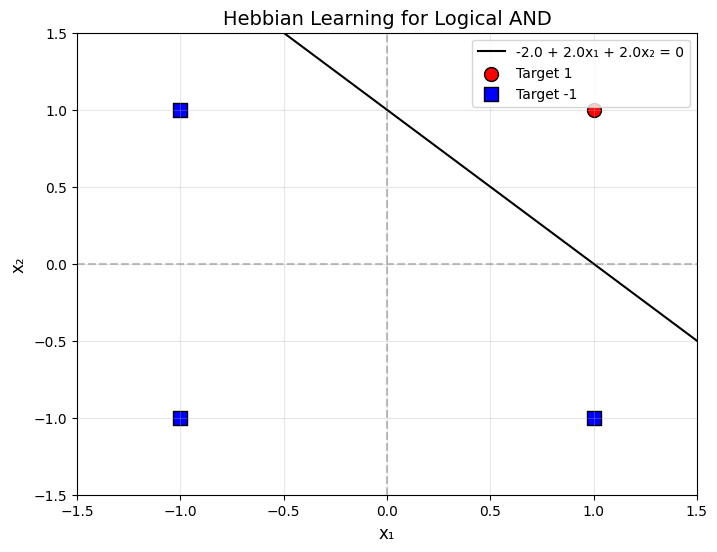

In [ ]:
# AND gate example with bipolar representation (matches theory's Input Patterns)
inputs_and = np.array([
    [1, 1, 1],    # Bias (x0=+1), x1=1, x2=1 → t=1
    [1, 1, -1],   # Bias (x0=+1), x1=1, x2=-1 → t=-1
    [1, -1, 1],   # Bias (x0=+1), x1=-1, x2=1 → t=-1
    [1, -1, -1]   # Bias (x0=+1), x1=-1, x2=-1 → t=-1
])
outputs_and = np.array([1, -1, -1, -1])

# Learn weights starting from zero initialization
weights_and = hebbian_learning(
    inputs_and,
    outputs_and,
    learning_rate=1.0,
    epochs=1,
    initial_weights=np.zeros(3)
)

print("Learned weights using Hebb rule:", weights_and)
plot_hebbian_results(inputs_and, outputs_and, weights_and)

Learned weights for OR gate: [2. 2. 2.]


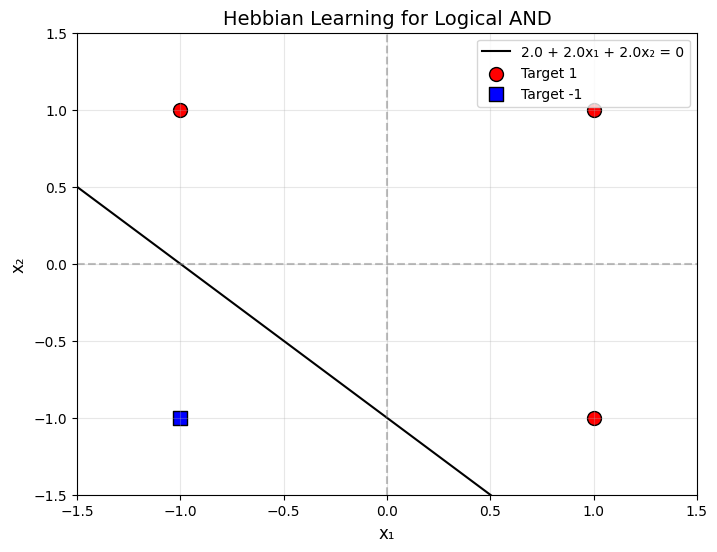

In [ ]:
# Example usage for the OR gate (with proper inputs)
inputs_or = np.array([
    [1, 1, 1],    # Bias (x0=+1), x1=1, x2=1 → t=1
    [1, 1, -1],   # Bias (x0=+1), x1=1, x2=-1 → t=1
    [1, -1, 1],   # Bias (x0=+1), x1=-1, x2=1 → t=1
    [1, -1, -1]   # Bias (x0=+1), x1=-1, x2=-1 → t=-1
])
outputs_or = np.array([1, 1, 1, -1])

# Learn weights starting from zero initialization
weights_or = hebbian_learning(
    inputs_or,
    outputs_or,
    learning_rate=1.0,
    epochs=1,
    initial_weights=np.zeros(3)
)

print("Learned weights for OR gate:", weights_or)
plot_hebbian_results(inputs_or, outputs_or, weights_or)

# **PERCEPTRON**

In [ ]:
import numpy as np

def perceptron_activation(y_in):
    """Perceptron activation function as defined in theory"""
    if y_in > 0:
        return 1
    elif y_in == 0:
        return 0
    else:
        return -1

def perceptron_learn(inputs, targets, learning_rate=1.0, max_epochs=100):
    """
    Implements the Perceptron Learning Rule exactly as described in the theory

    Parameters:
        inputs (ndarray): Input patterns with bias term (x0=+1)
        targets (ndarray): Target outputs (bipolar: 1 or -1)
        learning_rate (float): Learning rate η ∈ [0,1]
        max_epochs (int): Maximum training iterations

    Returns:
        ndarray: Learned weight vector
        list: Weight history during training
    """
    n_samples, n_features = inputs.shape
    weights = np.zeros(n_features)
    #weight_history = []

    for epoch in range(max_epochs):
        epoch_error = 0
        #weight_history.append(weights.copy())

        for i in range(n_samples):
            x = inputs[i]
            t = targets[i]

            # Calculate activation
            y_in = np.dot(weights, x)
            y_out = perceptron_activation(y_in)

            # Update rule
            if y_out != t:
                delta_w = learning_rate * x * t
                weights += delta_w
                epoch_error += 1

        if epoch_error == 0:
            break

    return weights


In [ ]:
# AND gate implementation from theory
inputs_and = np.array([
    [1, 1, 1],    # x0=+1, x1=1, x2=1 → t=1
    [1, 1, -1],   # x0=+1, x1=1, x2=-1 → t=-1
    [1, -1, 1],   # x0=+1, x1=-1, x2=1 → t=-1
    [1, -1, -1]   # x0=+1, x1=-1, x2=-1 → t=-1
])
targets_and = np.array([1, -1, -1, -1])

# Train the perceptron
learned_weights = perceptron_learn(
    inputs_and,
    targets_and,
    learning_rate=1.0
)

print("Final weights:", learned_weights)

Final weights: [-1.  1.  1.]


# **ADALINE**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def adaline_activation(y_in):
    """Linear activation function (identity function)"""
    return y_in

def adaline_learn(inputs, targets, learning_rate=0.01, max_epochs=100):
    """
    Implements ADALINE learning rule with online weight updates

    Parameters:
        inputs (ndarray): Input patterns with bias term
        targets (ndarray): Target outputs (continuous or bipolar)
        learning_rate (float): Learning rate (typically 0 < η <= 0.1)
        max_epochs (int): Maximum training iterations
        tolerance (float): Error threshold for early stopping

    Returns:
        ndarray: Learned weight vector
        list: MSE history during training
    """
    n_samples, n_features = inputs.shape
    weights = np.random.randn(n_features) * 0.01  # Small random initialization
    #mse_history = []

    for epoch in range(max_epochs):
        epoch_error = 0
        for x, t in zip(inputs, targets):
            # Calculate linear activation
            y_in = np.dot(weights, x)

            # Calculate error and update weights
            error = t - y_in
            weights += learning_rate * error * x

            # Accumulate squared error
            epoch_error += error**2
    return weights

def adaline_predict(inputs, weights):
    """Make predictions with threshold activation"""
    y_in = np.dot(inputs, weights)
    return np.where(y_in >= 0, 1, -1)  # Bipolar step function



In [ ]:
# AND gate implementation (bipolar representation)
inputs_and = np.array([
    [1, 1, 1],    # Bias (x0=+1), x1=1, x2=1 → t=1
    [1, 1, -1],   # Bias (x0=+1), x1=1, x2=-1 → t=-1
    [1, -1, 1],   # Bias (x0=+1), x1=-1, x2=1 → t=-1
    [1, -1, -1]   # Bias (x0=+1), x1=-1, x2=-1 → t=-1
])
targets_and = np.array([1, -1, -1, -1])

# Train ADALINE
learned_weights = adaline_learn(
    inputs_and,
    targets_and,
    learning_rate=0.01,
    max_epochs=100,
)

print("Final weights:", learned_weights)

Final weights: [-0.49127474  0.48869018  0.48632831]


# **MADALINE**